# Mask statistics (regionprops) #
This notebook shows how can we extract statistical information from an image (e.g. finding the maximal intensity in a desired region of interest). The steps that we need to follow to achieve this mainly depend on the exact problem we want to solve but in general it consists of: 

    Step 1: load and read the image (load-data.ipynb)
    Step 2: pre-process the image if necessary such as noise filtering (filter-image.ipynb)
    Step 3: find the region of interest: edge or inside the region? 
    Step 4: extract the desired information in the region of interest: mean, max, min, sum, median, mode, ...
    Step 5: display/plot results
    Step 6: save the plots in a given image format or values in a text/excel file

## Load image ##

In [2]:
# LOAD PACKAGES
from scyjava import config          # for AICSImage
from aicsimageio import AICSImage   # for reading the image
import numpy as np                  # for operations on arrays
import matplotlib.pyplot as plt     # for plotting/display 
import cv2                          # for generating random noise with a given distribution

In [4]:
# LOAD DATA
mydata=AICSImage("C:/Users/Dina Ratsimandresy/Documents/MRC-Office/Dataset/PythonCourse precious images/Airy_4color_40nm_67e5micron_diversoformato-confocal.tif")
myimg = mydata.data[0,:,0,:,:]  # select all channels at t = 0 and z = 0
imgsize = myimg.shape           # image size

## Display the image ##

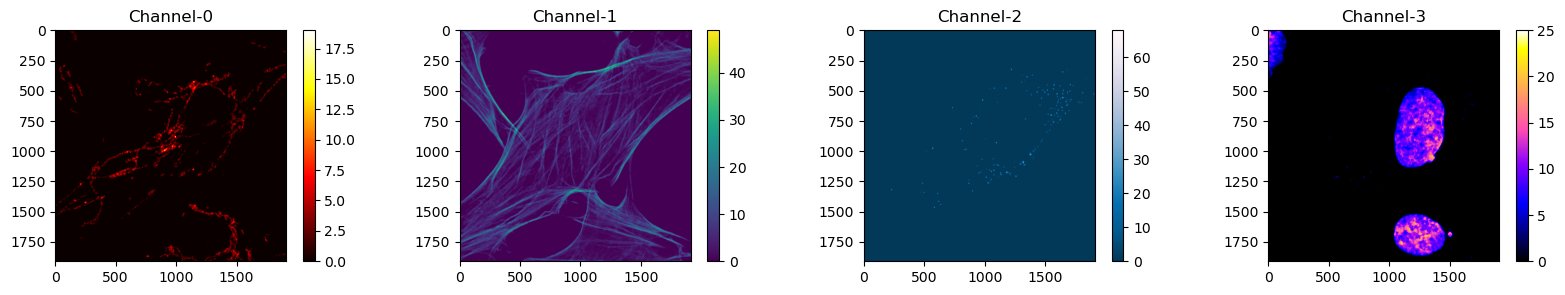

In [12]:
# define the colormap
cmpsuggestion=['hot','viridis','PuBu_r','gnuplot2']
# display each channel
fig, axs = plt.subplots(1, 4)
for k in range(4):
    ax1=axs[k].imshow(myimg[k,:,:], plt.colormaps[cmpsuggestion[k]])    
    axs[k].set_title('Channel-'+str(k))
    plt.colorbar(ax1,ax=axs[k]) 
fig.set_size_inches(20, 3)

# display the combined channel

## Define the problem ##
We need to define a problem here. Let say we are interested in what is happening in each channel in the same region as where the nucleus is. Our region of interest (ROI) is therefore defined by the region delimited by the nucleus in Channel-3. We want to measure:
- the maximal intensity in Channel-0 within this ROI,
- the median intensity in Channel-1 within this ROI,
- the mean intensity of Channel-2 of the ROI within this ROI  

That is enough problem for now so let's get into it :)

## Region of interest ##
In finding the ROI, the main goal is to find a mask delimited by the nucleus. The easiest way to do it by simply thresholding the image. By this, we find the region with intensity (pixel) values